In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [2]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'

In [152]:
library = 'il' # il or jc

#############################
# stack 13 bands and 15bands output catalog (Vincent's photometry)
cat_output_13 = Table.read(dev_path+'cat_test_output_13bands'+library+'.fits')
cat_output_15 = Table.read(dev_path+'cat_test_output'+library+'.fits')

# (COSMOS2020 photometry)
cat_output_c20_13 = Table.read(dev_path+'cat_test_output_13bands'+library+'_C20.fits')
cat_output_c20_15 = Table.read(dev_path+'cat_test_output'+library+'_C20.fits')
cat_output_c20_13.rename_column('Z_BEST','Z_BEST_13_c20mag')
cat_output_c20_15.rename_column('Z_BEST','Z_BEST_15_c20mag')

# (phosphoros photometry)
cat_output_phos_13 = Table.read(dev_path+'cat_test_output_13bands'+library+'_phos.fits')
cat_output_phos_15 = Table.read(dev_path+'cat_test_output'+library+'_phos.fits')
cat_output_phos_13.rename_column('Z_BEST','Z_BEST_13_phos')
cat_output_phos_15.rename_column('Z_BEST','Z_BEST_15_phos')

##############################
# keep useful columns and stack
cat_output_13 = cat_output_13['ID','Z_BEST','NBAND_USED_2']
cat_output_c20_13 = cat_output_c20_13['Z_BEST_13_c20mag']
cat_output_c20_15 = cat_output_c20_15['Z_BEST_15_c20mag']
cat_output_phos_13 = cat_output_phos_13['Z_BEST_13_phos']
cat_output_phos_15 = cat_output_phos_15['Z_BEST_15_phos']
cat_output = hstack([cat_output_15, cat_output_13],table_names=['15','13'])


# optional : include run results from C20 and phos photometry
# cat_output = hstack([cat_output, cat_output_c20_13])
# cat_output = hstack([cat_output, cat_output_c20_15])
# cat_output = hstack([cat_output, cat_output_phos_13])
# cat_output = hstack([cat_output, cat_output_phos_15])

# remove C20 duplicated columns
cat_output.remove_columns(['HSC_i_MAG_AUTO','HSC_i_MAGERR_AUTO','IRAC_CH1_MAG','IRAC_CH1_MAGERR','IRAC_CH2_MAG','IRAC_CH2_MAGERR'])
cat_output.write(dev_path+'cat_test_output_13and15'+library+'.fits',overwrite=True)

#### match output catalog with other catalogs

In [154]:
# match the output catalog with COSMOS2020 and save to disk

cat_output_name = dev_path+'cat_test_output_13and15'+library+'.fits'
cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
combined_cat_name = dev_path+'cat_test_output_13and15'+library+'_cosmosadded.fits'
join = '1and2'

# matching cat_output and cat_c20
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_output_name + \
                ' in2='+cat_c20_name+' find=best join='+join+' matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name
print(cmd)
os.system(cmd)

java -jar stilts.jar tmatch2 in1=/Users/lejay/research/lephare_dev/my_code/cat_test_output_13and15il.fits in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=/Users/lejay/research/lephare_dev/my_code/cat_test_output_13and15il_cosmosadded.fits


0

In [158]:
# match output catalog with thibaud's and vincent's and Guillaume's photometry and redshifts (inside_u, gal, unmasked)
# photometry, mass and redshift info

# thibaud's (does not have mass info)
cat_t_name = 'clauds_cat_v2020/l_cats/COSMOS_deep_v9_lephare_thibaud.fits'
cat_t = Table.read(cat_t_name) 
cat_t = cat_t['RA','DEC','Z_BEST','Z_ML_T']
cat_t.write('cat_t.fits',overwrite=True)

# vincent's `
cat_v_name = 'clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params.fits'
cat_v = Table.read(cat_v_name)
cat_v = cat_v['ID','RA','DEC','MASS_MED','ZPHOT']
cat_v.write('cat_v.fits',overwrite=True)

# Guillaume's (additional: cmodel magnitudes, no FUV NUV)
cat_g_name = '/Volumes/LejaySSD/p_cats_v211221/COSMOS-HSCpipe-Phosphoros_updated_211221_mags_trimed.fits'
cat_g = Table.read(cat_g_name)
cat_g = cat_g['RA','DEC','ZPHOT','MAG_CMODEL_MegaCam-u','MAGERR_CMODEL_MegaCam-u','MAG_CMODEL_MegaCam-uS','MAGERR_CMODEL_MegaCam-uS','MAG_CMODEL_HSC-G','MAGERR_CMODEL_HSC-G','MAG_CMODEL_HSC-R','MAGERR_CMODEL_HSC-R','MAG_CMODEL_HSC-I','MAGERR_CMODEL_HSC-I',
              'MAG_CMODEL_HSC-Z','MAGERR_CMODEL_HSC-Z','MAG_CMODEL_HSC-Y','MAGERR_CMODEL_HSC-Y','MAG_CMODEL_VIRCAM-Y','MAGERR_CMODEL_VIRCAM-Y','MAG_CMODEL_VIRCAM-J','MAGERR_CMODEL_VIRCAM-J','MAG_CMODEL_VIRCAM-H','MAGERR_CMODEL_VIRCAM-H','MAG_CMODEL_VIRCAM-Ks',
              'MAGERR_CMODEL_VIRCAM-Ks','MAG_APER_2_MegaCam-u','MAGERR_APER_2_MegaCam-u','MAG_APER_2_MegaCam-uS','MAGERR_APER_2_MegaCam-uS','MAG_APER_2_HSC-G','MAGERR_APER_2_HSC-G','MAG_APER_2_HSC-R','MAGERR_APER_2_HSC-R','MAG_APER_2_HSC-I','MAGERR_APER_2_HSC-I',
              'MAG_APER_2_HSC-Z','MAGERR_APER_2_HSC-Z','MAG_APER_2_HSC-Y','MAGERR_APER_2_HSC-Y','MAG_APER_2_VIRCAM-Y','MAGERR_APER_2_VIRCAM-Y','MAG_APER_2_VIRCAM-J','MAGERR_APER_2_VIRCAM-J','MAG_APER_2_VIRCAM-H','MAGERR_APER_2_VIRCAM-H','MAG_APER_2_VIRCAM-Ks',
              'MAGERR_APER_2_VIRCAM-Ks']
cat_g.write('cat_g.fits',overwrite=True)

# multi-matching
cat_output_c20added_name = dev_path+'cat_test_output_13and15'+library+'_cosmosadded.fits'
combined_cat_name = dev_path+'cat_test_output_13and15'+library+'_matched.fits'
join = 'all1'

cmd = 'java -jar stilts.jar tmatchn multimode=pairs nin=4 matcher=sky params=1.0\
       in1='+cat_output_c20added_name+' values1="RA DEC" \
       in2=cat_t.fits values2="RA DEC" \
       in3=cat_v.fits values3="RA DEC" \
       in4=cat_g.fits values4="RA DEC" \
       out='+ combined_cat_name
print(cmd)
os.system(cmd)
    

java -jar stilts.jar tmatchn multimode=pairs nin=4 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/cat_test_output_13and15il_cosmosadded.fits values1="RA DEC"        in2=cat_t.fits values2="RA DEC"        in3=cat_v.fits values3="RA DEC"        in4=cat_g.fits values4="RA DEC"        out=/Users/lejay/research/lephare_dev/my_code/cat_test_output_13and15il_matched.fits


0

In [159]:
# rename columns in matched catalog 
cat_matched = Table.read(combined_cat_name)
cat_matched.remove_columns(['RA_2','DEC_2','RA_3','DEC_3','RA_4','DEC_4','ZPHOT_1','MASS_MED_1'])
cat_matched.rename_column('ZPHOT_3','ZPHOT_V')
cat_matched.rename_column('ZPHOT_4','ZPHOT_G')
cat_matched.rename_column('Z_BEST','Z_BEST_T')
cat_matched.rename_column('MASS_MED_3','MASS_MED_V')
cat_matched.write(combined_cat_name,overwrite=True)
print(len(cat_matched))
print(cat_matched.info)

70
<Table masked=True length=70>
          name            dtype    unit 
------------------------ ------- -------
                   ID_15   int64        
                    RA_1 float64        
                   DEC_1 float64        
                    MASK   int16        
                     FUV float64        
                     NUV float64        
                       u float64        
                      uS float64        
                       g float64        
                       r float64        
                       i float64        
                       z float64        
                       y float64        
                      Yv float64        
                       J float64        
                       H float64        
                      Ks float64        
                 FUV_err float64        
                 NUV_err float64        
                   u_err float64        
                  uS_err float64        
                   g_err

In [147]:
# statistics
outlier_factor = 0.3

print('Matched with C20:',len(cat_matched))
cat_matched = cat_matched[cat_matched['Z_BEST_13']>-90]
cat_matched = cat_matched[cat_matched['Z_BEST_15']>-90]
print('Good z-estimation (not -99):',len(cat_matched))
print('z13 better:',len(cat_matched[abs(cat_matched['Z_BEST_15']-cat_matched['lp_zPDF'])>abs(cat_matched['Z_BEST_13']-cat_matched['lp_zPDF'])]))
print('z15 better:',len(cat_matched[abs(cat_matched['Z_BEST_13']-cat_matched['lp_zPDF'])>=abs(cat_matched['Z_BEST_15']-cat_matched['lp_zPDF'])]))

# number of outliers
print('+++++++++++++++++++')
num_outliers_15 = len(cat_matched[abs(cat_matched['lp_zPDF']-cat_matched['Z_BEST_15'])>outlier_factor*(1+cat_matched['lp_zPDF'])])
num_goodzs_15 = len(cat_matched[abs(cat_matched['lp_zPDF']-cat_matched['Z_BEST_15'])<outlier_factor*(1+cat_matched['lp_zPDF'])])
print('outliers 13bands:',len(cat_matched[abs(cat_matched['lp_zPDF']-cat_matched['Z_BEST_13'])>outlier_factor*(1+cat_matched['lp_zPDF'])]))
print('outliers 15bands:',num_outliers_15)

# outliers in massive gals
print('+++++++++++++++++++')
cat_output_massive = cat_matched[cat_matched['MASS_MED_V']>11.3]
print('maassive_gals:',len(cat_output_massive))
print('massive outliers 13bands:',len(cat_output_massive[abs(cat_output_massive['lp_zPDF']-cat_output_massive['Z_BEST_13'])>outlier_factor*(1+cat_output_massive['lp_zPDF'])]))
print('massive outliers 15bands:',len(cat_output_massive[abs(cat_output_massive['lp_zPDF']-cat_output_massive['Z_BEST_15'])>outlier_factor*(1+cat_output_massive['lp_zPDF'])]))

Matched with C20: 59
Good z-estimation (not -99): 58
z13 better: 26
z15 better: 32
+++++++++++++++++++
outliers 13bands: 2
outliers 15bands: 3
+++++++++++++++++++
maassive_gals: 4
massive outliers 13bands: 1
massive outliers 15bands: 1


#### plots

outliers: 12
outliers z15>z13: 4
outliers z15<z13: 8


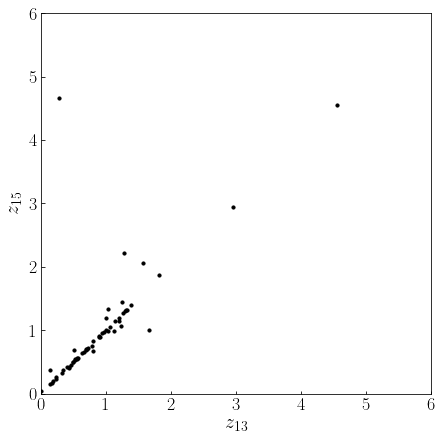

In [148]:
fig, axs = plt.subplots(1, 1, figsize = (7, 7))
plt.scatter(cat_matched['Z_BEST_13'],cat_matched['Z_BEST_15'],s=10,color='k',marker='o')
plt.xlim([0,6])
plt.ylim([0,6])
plt.xlabel('$z_{13}$',fontsize=20)
plt.ylabel('$z_{15}$',fontsize=20)
print('outliers:',len(cat_matched[abs(cat_matched['Z_BEST_13']-cat_matched['Z_BEST_15'])>0.05*(1+cat_matched['Z_BEST_15'])]))
print('outliers z15>z13:',len(cat_matched[(cat_matched['Z_BEST_13']-cat_matched['Z_BEST_15'])>0.05*(1+cat_matched['Z_BEST_15'])]))
print('outliers z15<z13:',len(cat_matched[(cat_matched['Z_BEST_15']-cat_matched['Z_BEST_13'])>0.05*(1+cat_matched['Z_BEST_15'])]))

(0, 6)

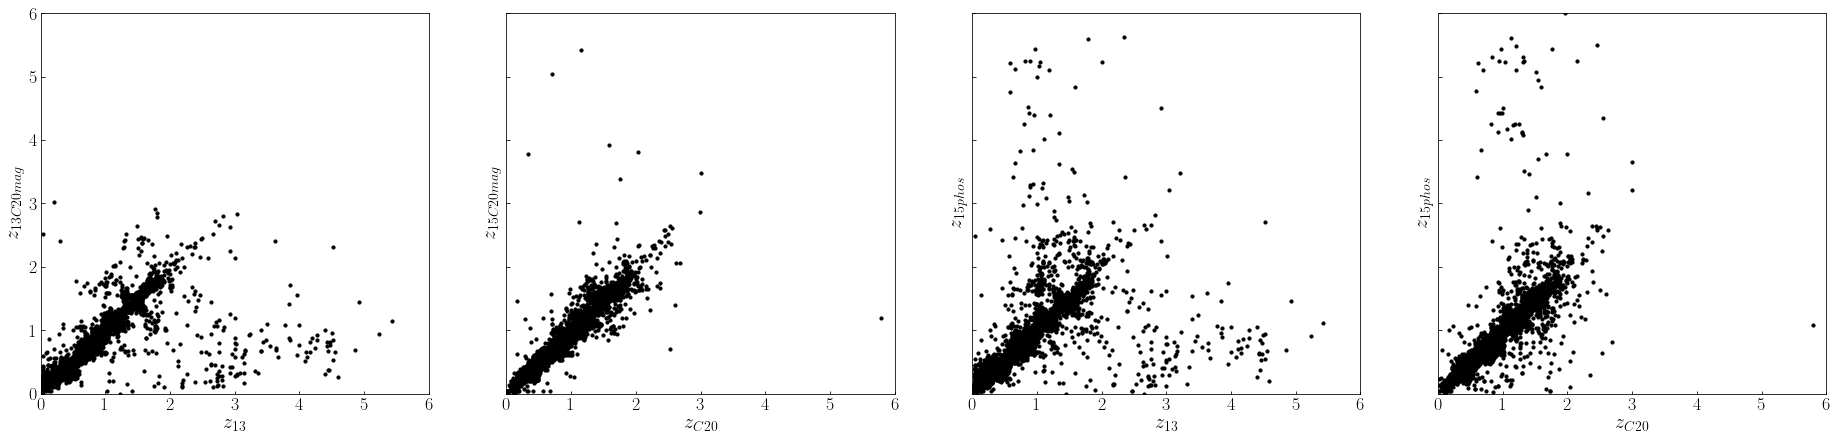

In [45]:
fig, axs = plt.subplots(1, 4, figsize = (32, 7),sharex=True, sharey=True)

axs[0].scatter(cat_matched['Z_BEST_13'],cat_matched['Z_BEST_13_c20mag'],s=10,color='k',marker='o')
axs[0].set_xlabel('$z_{13}$',fontsize=20)
axs[0].set_ylabel('$z_{13 C20mag}$',fontsize=20)

axs[1].scatter(cat_matched['lp_zPDF'],cat_matched['Z_BEST_15_c20mag'],s=10,color='k',marker='o')
axs[1].set_xlabel('$z_{C20}$',fontsize=20)
axs[1].set_ylabel('$z_{15 C20mag}$',fontsize=20)

axs[2].scatter(cat_matched['Z_BEST_13'],cat_matched['Z_BEST_13_phos'],s=10,color='k',marker='o')
axs[2].set_xlabel('$z_{13}$',fontsize=20)
axs[2].set_ylabel('$z_{15 phos}$',fontsize=20)

axs[3].scatter(cat_matched['lp_zPDF'],cat_matched['Z_BEST_15_phos'],s=10,color='k',marker='o')
axs[3].set_xlabel('$z_{C20}$',fontsize=20)
axs[3].set_ylabel('$z_{15 phos}$',fontsize=20)

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])


Text(0, 0.5, 'MASS\\_MED\\_V')

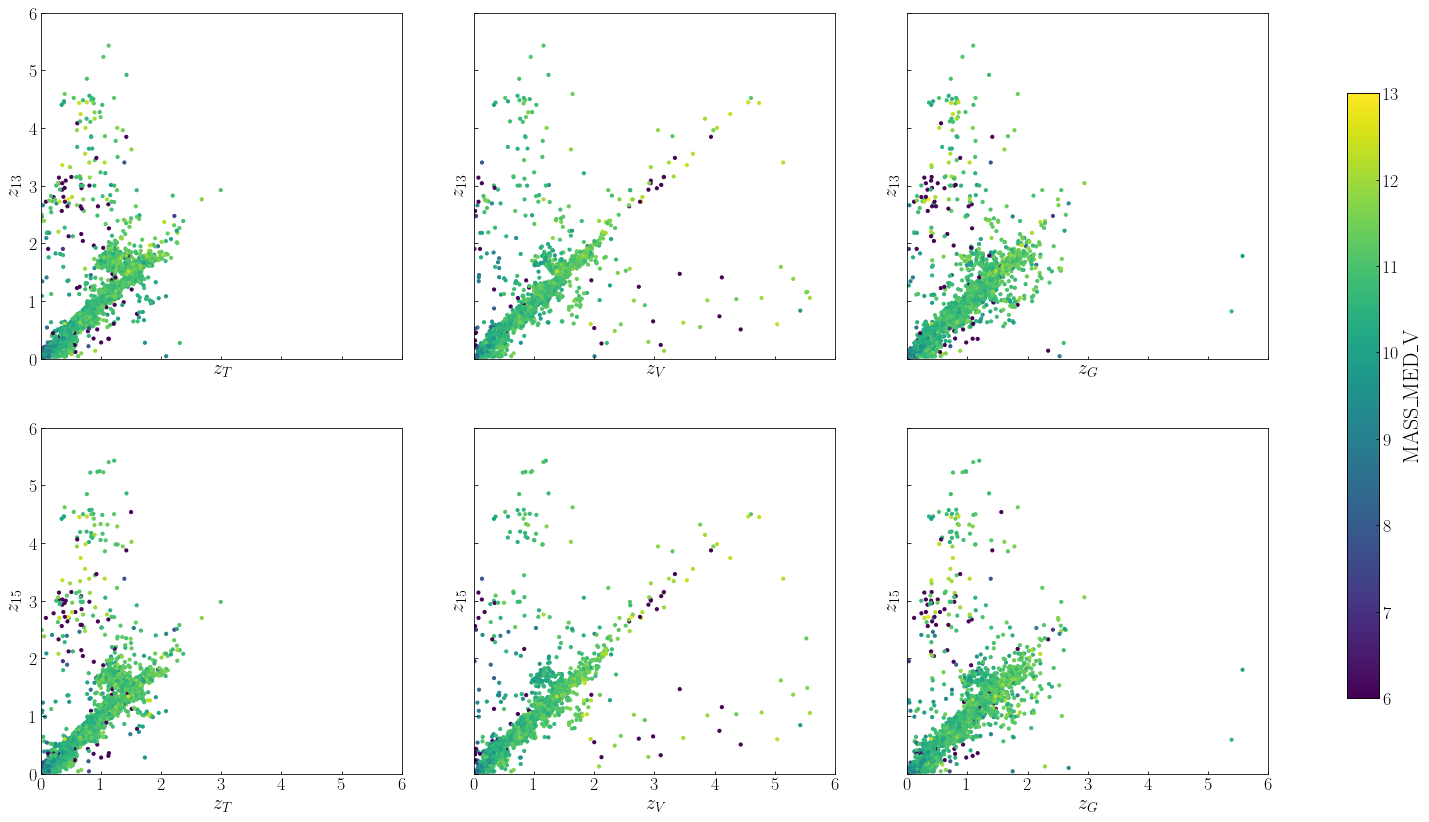

In [22]:
fig, axs = plt.subplots(2, 3, figsize = (22, 14),sharex=True, sharey=True)

for i,num_bands in enumerate(['13','15']):
    axs[i][0].scatter(cat_matched['Z_BEST_T'],cat_matched['Z_BEST_'+num_bands],s=10,c=cat_matched['MASS_MED_V'],vmin=6,vmax=13,marker='o')
    axs[i][0].set_xlim([0,6])
    axs[i][0].set_ylim([0,6])
    axs[i][0].set_xlabel('$z_{T}$',fontsize=20)
    axs[i][0].set_ylabel('$z_{'+num_bands+'}$',fontsize=20)

    axs[i][1].scatter(cat_matched['ZPHOT_V'],cat_matched['Z_BEST_'+num_bands],s=10,c=cat_matched['MASS_MED_V'],vmin=6,vmax=13,marker='o')
    axs[i][1].set_xlabel('$z_{V}$',fontsize=20)
    axs[i][1].set_ylabel('$z_{'+num_bands+'}$',fontsize=20)

    im = axs[i][2].scatter(cat_matched['ZPHOT_G'],cat_matched['Z_BEST_'+num_bands],s=10,c=cat_matched['MASS_MED_V'],vmin=6,vmax=13,marker='o')
    axs[i][2].set_xlabel('$z_{G}$',fontsize=20)
    axs[i][2].set_ylabel('$z_{'+num_bands+'}$',fontsize=20)

cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel('MASS\_MED\_V',fontsize=22)

In [150]:
cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
         ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

cond_ch1 = ( (cat_matched['MAG_AUTO_CH1'] > 0.) & (cat_matched['MAG_AUTO_CH1'] < 50.) & (cat_matched['MAGERR_AUTO_CH1'] > 0.) & (cat_matched['MAGERR_AUTO_CH1'] < 0.5) )
cond_ch2 = ( (cat_matched['MAG_AUTO_CH2'] > 0.) & (cat_matched['MAG_AUTO_CH2'] < 50.) & (cat_matched['MAGERR_AUTO_CH2'] > 0.) & (cat_matched['MAGERR_AUTO_CH2'] < 0.5) )
flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 

cond_massive_c20 = (cat_matched['lp_mass_med']>11.3)

outliers 13bands: 0.05504587155963303
outliers 15bands: 0.03363914373088685


(0, 6)

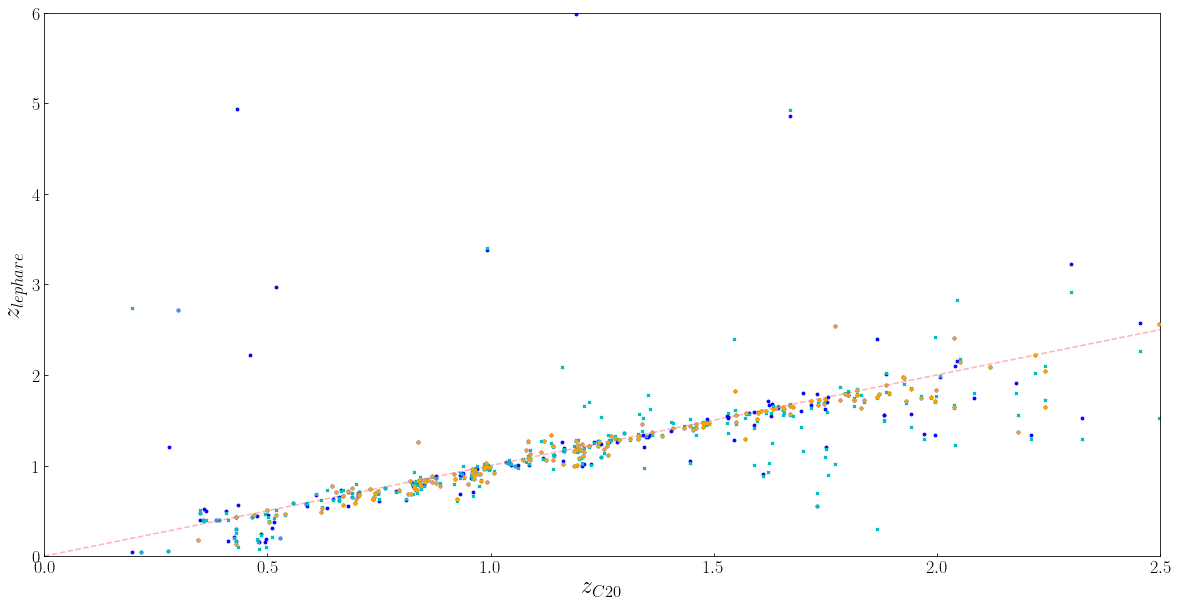

In [138]:
fig, axs = plt.subplots(1, 1, figsize = (20, 10))
cat_massive_irac = cat_matched[cond_massive_c20 & (flag_irac>=2)]

# plt.scatter(cat_matched[cond_massive_c20]['lp_zPDF'],cat_matched[cond_massive_c20]['Z_BEST_15'],s=8,c='k',marker='o')
# plt.scatter(cat_matched[cond_massive_c20 & (flag_nir>=3)]['lp_zPDF'],cat_matched[cond_massive_c20 & (flag_nir>=3)]['Z_BEST_15'],s=8,c='r',marker='o')
plt.scatter(cat_matched[cond_massive_c20 & (flag_irac>=2)]['lp_zPDF'],cat_matched[cond_massive_c20 & (flag_irac>=2)]['Z_BEST_15'],s=8,c='b',marker='o')
plt.scatter(cat_matched[cond_massive_c20 & (flag_irac>=2) & (flag_nir>=2)]['lp_zPDF'],cat_matched[cond_massive_c20 & (flag_irac>=2) & (flag_nir>=2)]['Z_BEST_15'],s=8,c='orange',marker='o',zorder=10)

# plt.scatter(cat_matched[cond_massive_c20]['lp_zPDF'],cat_matched[cond_massive_c20]['Z_BEST_13'],s=8,c='k',marker='x')
# plt.scatter(cat_matched[cond_massive_c20 & (flag_nir>=3)]['lp_zPDF'],cat_matched[cond_massive_c20 & (flag_nir>=3)]['Z_BEST_13'],s=8,c='r',marker='x')
plt.scatter(cat_matched[cond_massive_c20 & (flag_irac>=2)]['lp_zPDF'],cat_matched[cond_massive_c20 & (flag_irac>=2)]['Z_BEST_13'],s=8,c='c',marker='x')

num_outliers_15 = len(cat_massive_irac[abs(cat_massive_irac['lp_zPDF']-cat_massive_irac['Z_BEST_15'])>outlier_factor*(1+cat_massive_irac['lp_zPDF'])])
num_outliers_13 = len(cat_massive_irac[abs(cat_massive_irac['lp_zPDF']-cat_massive_irac['Z_BEST_13'])>outlier_factor*(1+cat_massive_irac['lp_zPDF'])])

print('outliers 13bands:',num_outliers_13/len(cat_massive_irac))
print('outliers 15bands:',num_outliers_15/len(cat_massive_irac))

plt.plot([0,6],[0,6],'--r',alpha=0.3)
plt.xlabel('$z_{C20}$',fontsize=24)
plt.ylabel('$z_{lephare}$',fontsize=24)
plt.xlim([0,2.5])
plt.ylim([0,6])


(0, 6)

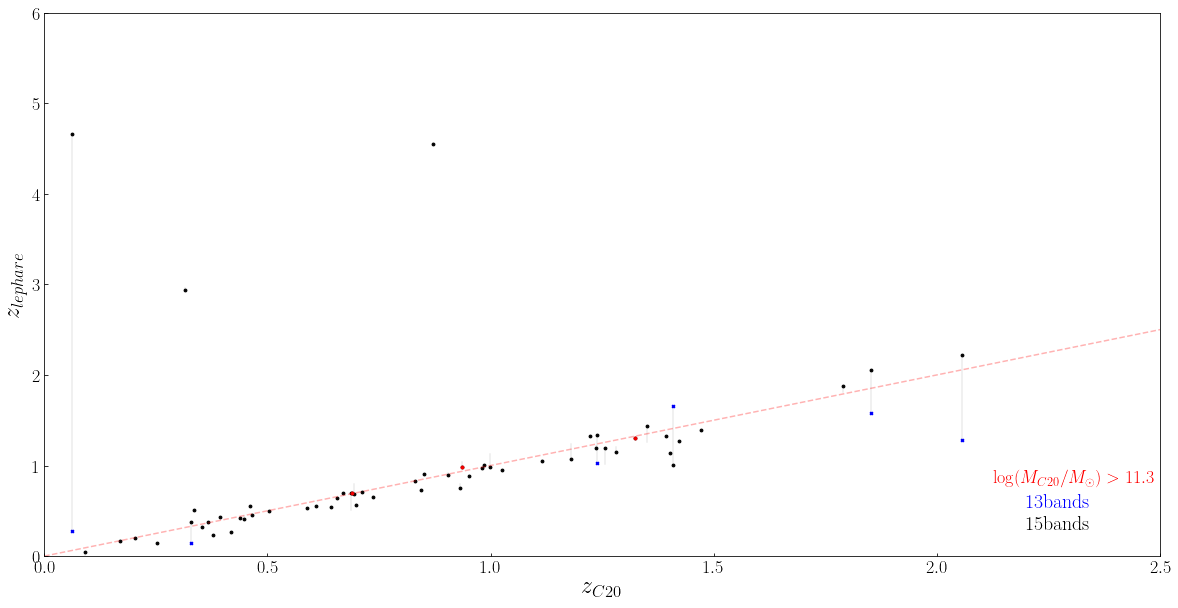

In [151]:
fig, axs = plt.subplots(1, 1, figsize = (20, 10))
plt.scatter(cat_matched['lp_zPDF'],cat_matched['Z_BEST_15'],s=8,color='k',marker='o')
cond_no_agree = (abs(cat_matched['Z_BEST_13']-cat_matched['Z_BEST_15'])>=0.2)
plt.scatter(cat_matched[cond_no_agree]['lp_zPDF'],cat_matched[cond_no_agree]['Z_BEST_13'],s=8,color='b',marker='X')
plt.scatter(cat_matched[cond_massive_c20]['lp_zPDF'],cat_matched[cond_massive_c20]['Z_BEST_15'],s=8,color='r',marker='o')
plt.plot([cat_matched['lp_zPDF'],cat_matched['lp_zPDF']],[cat_matched['Z_BEST_13'],cat_matched['Z_BEST_15']],color='k',alpha=0.08)

plt.annotate('15bands',xy=([0.88,0.05]),xycoords='axes fraction',fontsize=20,color='k')
plt.annotate('13bands',xy=([0.88,0.09]),xycoords='axes fraction',fontsize=20,color='b')
plt.annotate('$\log(M_{C20}/M_\odot)>11.3$',xy=([0.85,0.13]),xycoords='axes fraction',fontsize=18,color='r')
plt.plot([0,6],[0,6],'--r',alpha=0.3)

plt.xlabel('$z_{C20}$',fontsize=24)
plt.ylabel('$z_{lephare}$',fontsize=24)
plt.xlim([0,2.5])
plt.ylim([0,6])

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


#### 13 bands #######
outliers: 0 6.0 6.24 13
goodzs 2 9.0 8.81 13
#### 15 bands #######
outliers: 2 8.0 8.42 15
goodzs 2 11.0 10.79 15


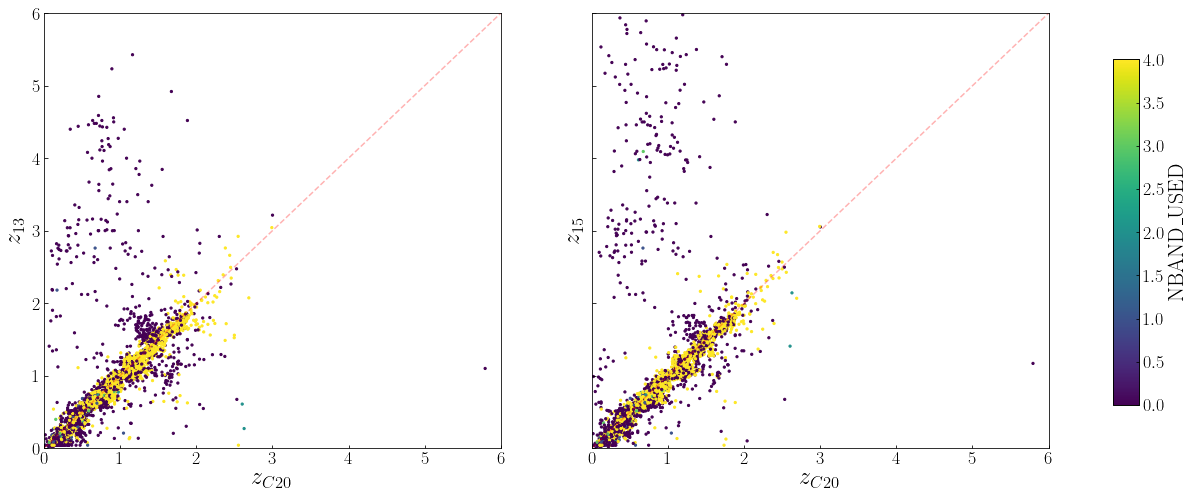

In [104]:
# color-coded by NBAND_USED
fig, axs = plt.subplots(1, 2, figsize = (18, 8),sharex=True, sharey=True)
im = axs[0].scatter(cat_matched['lp_zPDF'],cat_matched['Z_BEST_13'],s=5,c=flag_nir,vmin=0, vmax=4,marker='o')
axs[1].scatter(cat_matched['lp_zPDF'],cat_matched['Z_BEST_15'],s=5,c=flag_nir,vmin=0, vmax=4,marker='o')

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{C20}$',fontsize=24)
axs[1].set_xlabel('$z_{C20}$',fontsize=24)
axs[0].set_ylabel('$z_{13}$',fontsize=24)
axs[1].set_ylabel('$z_{15}$',fontsize=24)
axs[0].plot([0,6],[0,6],'--r',alpha=0.3)
axs[1].plot([0,6],[0,6],'--r',alpha=0.3)
cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel('NBAND\_USED',fontsize=22)

# some stats
outlier_factor = 0.3

for num_filters in ['13','15']:
    outliers = cat_matched[abs(cat_matched['lp_zPDF']-cat_matched['Z_BEST_'+num_filters])>outlier_factor*(1+cat_matched['lp_zPDF'])]
    goodzs = cat_matched[abs(cat_matched['lp_zPDF']-cat_matched['Z_BEST_'+num_filters])<outlier_factor*(1+cat_matched['lp_zPDF'])]
    print('#### '+num_filters+' bands #######')
    print('outliers:',min(outliers['NBAND_USED_2_'+num_filters]),np.median(outliers['NBAND_USED_2_'+num_filters]),round(np.mean(outliers['NBAND_USED_2_'+num_filters]),2),max(outliers['NBAND_USED_2_'+num_filters]))
    print('goodzs',min(goodzs['NBAND_USED_2_'+num_filters]),np.median(goodzs['NBAND_USED_2_'+num_filters]),round(np.mean(goodzs['NBAND_USED_2_'+num_filters]),2),max(goodzs['NBAND_USED_2_'+num_filters]))

(0, 6)

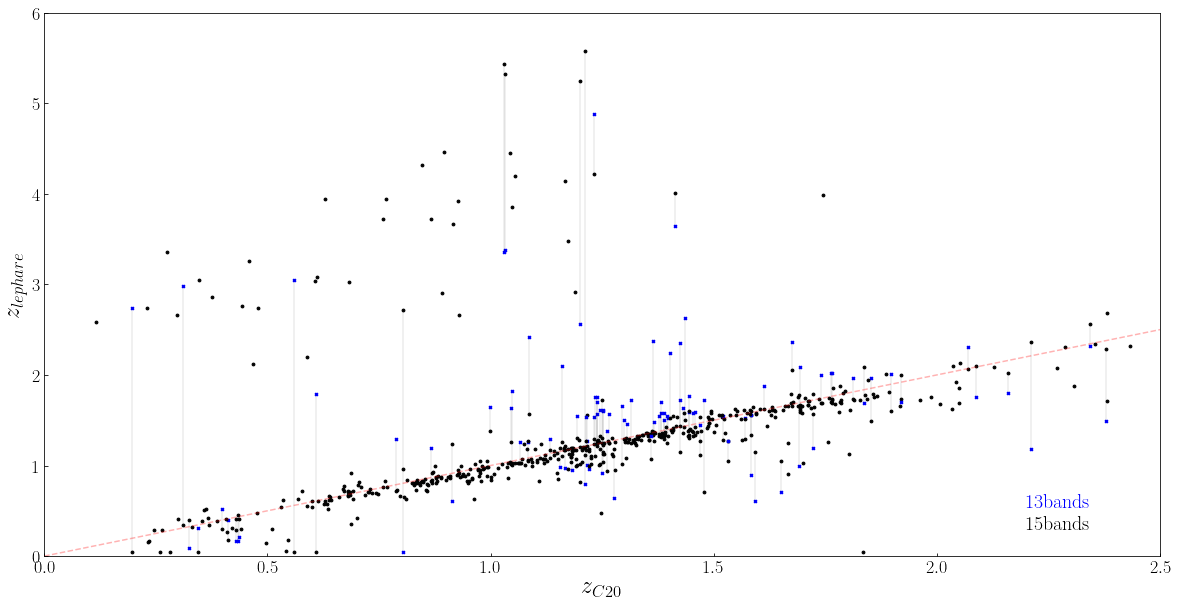

In [256]:
fig, axs = plt.subplots(1, 1, figsize = (20, 10))

for i in range(len(cat_output_massive)):
    color='k'
    plt.scatter(cat_output_massive[i]['lp_zPDF'],cat_output_massive[i]['Z_BEST_15'],s=8,color=color,marker='o')
    if abs(cat_output_massive[i]['Z_BEST_13'] - cat_output_massive[i]['Z_BEST_15'])>0.2:
        plt.scatter(cat_output_massive[i]['lp_zPDF'],cat_output_massive[i]['Z_BEST_13'],s=8,color='b',marker='X')
        plt.plot([cat_output_massive[i]['lp_zPDF'],cat_output_massive[i]['lp_zPDF']],[cat_output_massive[i]['Z_BEST_13'],cat_output_massive[i]['Z_BEST_15']],color='k',alpha=0.08)

plt.annotate('15bands',xy=([0.88,0.05]),xycoords='axes fraction',fontsize=20,color='k')
plt.annotate('13bands',xy=([0.88,0.09]),xycoords='axes fraction',fontsize=20,color='b')
plt.plot([0,6],[0,6],'--r',alpha=0.3)

plt.xlabel('$z_{C20}$',fontsize=24)
plt.ylabel('$z_{lephare}$',fontsize=24)
plt.xlim([0,2.5])
plt.ylim([0,6])

In [81]:
# equivalent wavelength
lbeff = [0.1543, 0.2278, 0.3739, 0.3889, 0.4718, 0.6135, 0.7615, 0.8898, 0.9746, 1.0186, 1.2468, 1.6316, 2.1333, 3.5133, 4.4429]

# 0 FUV
# 1 NUV
# 2 u
# 3 uS
# 4 g
# 5 r
# 6 i 
# 7 z
# 8 y
# 9 Y
# 10 J
# 11 H
# 12 K
# 13 CH1
# 14 CH2

In [127]:
# check fraction of inconsistent photometry

wrong_phot_gal_z_wrong = 0
wrong_phot_gal_z_correct = 0
for gal in cat_matched:
    wrong_phot_filter = 0
    for i in range(len(filter_set_clauds)):
        if abs(gal[filter_set_clauds[i]]-gal[filter_set_c20[i]])>0.5:
            wrong_phot_filter += 1
    
    if wrong_phot_filter>1:
        if abs(gal['Z_BEST_15'] - gal['lp_zPDF'])>0.2*(1+gal['lp_zPDF']):
            wrong_phot_gal_z_wrong += 1
        else:
            wrong_phot_gal_z_correct += 1

print('z wrong:',str(wrong_phot_gal_z_wrong)+'/'+str(num_outliers_15))
print('z correct:',str(wrong_phot_gal_z_correct)+'/'+str(num_goodzs_15))       

z wrong: 109/437
z correct: 982/5211


#### plot photometry (SED)

In [271]:
# select in redshift ranges
cat_output_selected = cat_matched[cat_matched['lp_zPDF']>2.5]
cat_output_selected = cat_output_selected[cat_output_selected['lp_zPDF']<6]
cat_output_selected = cat_output_selected[cat_output_selected['Z_BEST_15']>3]
cat_output_selected = cat_output_selected[cat_output_selected['Z_BEST_15']<6]

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [261]:
mag_type = 'MAG_APER'
print(mag_type)

if mag_type == 'MAG_AUTO': # auto magnitudes
    filter_set_clauds = ['FUV','NUV','u','uS','g','r','i','z','y','Yv','J','H','Ks','MAG_AUTO_CH1_CORR','MAG_AUTO_CH2_CORR']
    filter_set_c20 =  ['GALEX_FUV_MAG','GALEX_NUV_MAG','CFHT_u_MAG_AUTO','CFHT_ustar_MAG_AUTO','HSC_g_MAG_AUTO','HSC_r_MAG_AUTO','HSC_i_MAG_AUTO','HSC_z_MAG_AUTO','HSC_y_MAG_AUTO',
                   'UVISTA_Y_MAG_AUTO','UVISTA_J_MAG_AUTO','UVISTA_H_MAG_AUTO','UVISTA_Ks_MAG_AUTO','IRAC_CH1_MAG','IRAC_CH2_MAG']
    filter_set_phos = ['FUV','NUV','MAG_CMODEL_MegaCam-u','MAG_CMODEL_MegaCam-uS','MAG_CMODEL_HSC-G','MAG_CMODEL_HSC-R','MAG_CMODEL_HSC-I','MAG_CMODEL_HSC-Z','MAG_CMODEL_HSC-Y',
                       'MAG_CMODEL_VIRCAM-Y','MAG_CMODEL_VIRCAM-J','MAG_CMODEL_VIRCAM-H','MAG_CMODEL_VIRCAM-Ks','IRAC_CH1_MAG','IRAC_CH2_MAG']
elif mag_type == 'MAG_APER': # aperture mg
    filter_set_clauds = ['FUV','NUV','MAG_APER_2s_u','MAG_APER_2s_uS','MAG_APER_2s_g','MAG_APER_2s_r','MAG_APER_2s_i','MAG_APER_2s_z','MAG_APER_2s_y','MAG_APER_2s_Yv','MAG_APER_2s_J','MAG_APER_2s_H','MAG_APER_2s_Ks','MAG_AUTO_CH1_CORR','MAG_AUTO_CH2_CORR']
    filter_set_c20 =  ['GALEX_FUV_MAG','GALEX_NUV_MAG','CFHT_u_MAG_APER2','CFHT_ustar_MAG_APER2','HSC_g_MAG_APER2','HSC_r_MAG_APER2','HSC_i_MAG_APER2','HSC_z_MAG_APER2','HSC_y_MAG_APER2',
                   'UVISTA_Y_MAG_APER2','UVISTA_J_MAG_APER2','UVISTA_H_MAG_APER2','UVISTA_Ks_MAG_APER2','IRAC_CH1_MAG','IRAC_CH2_MAG']
    filter_set_phos = ['FUV','NUV','MAG_APER_2_MegaCam-u','MAG_APER_2_MegaCam-uS','MAG_APER_2_HSC-G','MAG_APER_2_HSC-R','MAG_APER_2_HSC-I','MAG_APER_2_HSC-Z','MAG_APER_2_HSC-Y',
                       'MAG_APER_2_VIRCAM-Y','MAG_APER_2_VIRCAM-J','MAG_APER_2_VIRCAM-H','MAG_APER_2_VIRCAM-Ks','IRAC_CH1_MAG','IRAC_CH2_MAG']

MAG_APER


MAG_AUTO
58


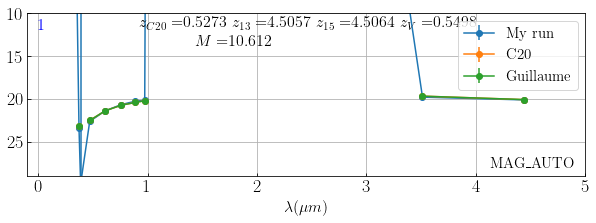

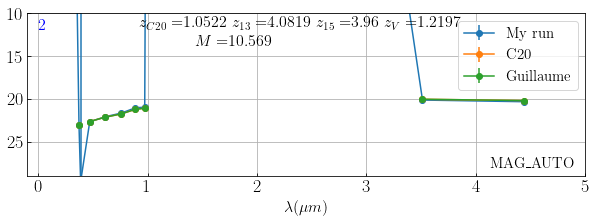

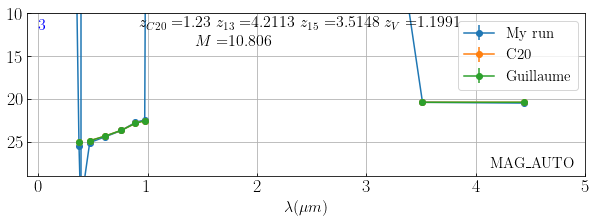

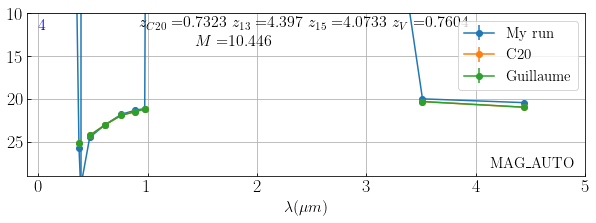

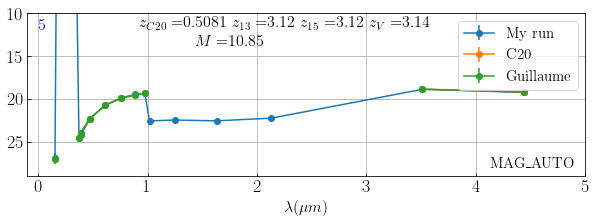

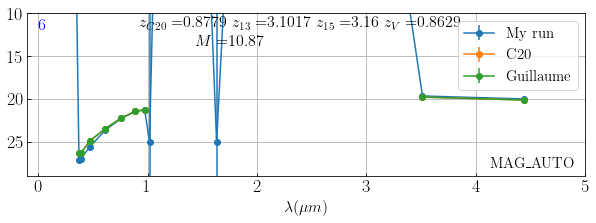

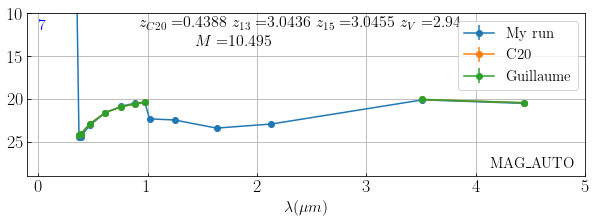

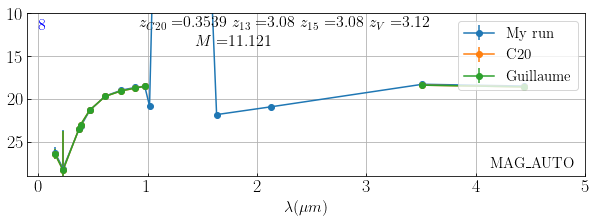

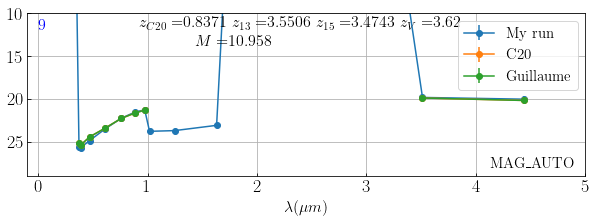

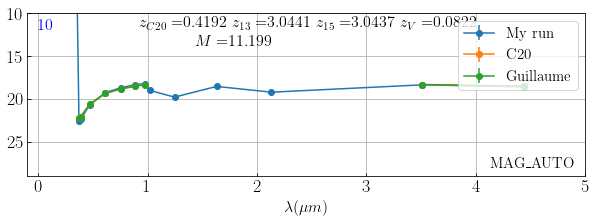

In [120]:
# lbeff_selected = [lbeff[0],lbeff[4],lbeff[5],lbeff[6],lbeff[7],lbeff[8]]

# show SED of the gals (bagpipes?)
print(len(cat_output_massive_select))
for num,gal in enumerate(cat_output_selected):
    fig, axs = plt.subplots(1,1, figsize = (10, 3))
    mag_list_clauds = []
    mag_list_c20 = []
    mag_list_phos = []
    mag_list_clauds_err = []
    mag_list_c20_err = []
    mag_list_phos_err = []
    for i in range(len(filter_set_clauds)):
        
        # mags
        mag_list_clauds.append(gal[filter_set_clauds[i]])
        mag_list_c20.append(gal[filter_set_c20[i]])
        mag_list_phos.append(gal[filter_set_phos[i]])
        
        # magerrs
        if 'MAG' in filter_set_clauds[i]:
            mag_list_clauds_err.append(gal[filter_set_clauds[i].replace('MAG','MAGERR')])   
        else:
            mag_list_clauds_err.append(gal[filter_set_clauds[i]+'_err'])
            
        if 'MAG' in filter_set_phos[i]:
            mag_list_phos_err.append(gal[filter_set_phos[i].replace('MAG','MAGERR')])
        else:
            mag_list_phos_err.append(gal[filter_set_phos[i]+'_err'])
            
        mag_list_c20_err.append(gal[filter_set_c20[i].replace('MAG','MAGERR')])
    
    # overplot sed
    plt.errorbar(lbeff, mag_list_clauds,yerr=mag_list_clauds_err,fmt='o-',label='My run')
    plt.errorbar(lbeff, mag_list_c20,yerr=mag_list_c20_err,fmt='o-',label='C20')
    plt.errorbar(lbeff, mag_list_c20,yerr=mag_list_c20_err,fmt='o-',label='Guillaume')
    plt.xlim([-0.1,5])
    plt.ylim([29,10])
    plt.legend(loc='upper right',fontsize=15)
    
    # plot difference
#     plt.errorbar(lbeff,np.array(mag_list_clauds) - np.array(mag_list_c20),yerr=0,fmt='o-',label='My run')
#     plt.xlim([-0.1,5])
#     plt.ylim([-1,1])
#     plt.legend(loc='upper right',fontsize=15)
    
    plt.annotate('$z_{C20}=$'+str(gal['lp_zPDF'])+' '+'$z_{13}=$'+str(gal['Z_BEST_13'])+' '+'$z_{15}=$'+str(gal['Z_BEST_15'])+' '+'$z_{V}=$'+str(gal['ZPHOT_V']),xy=([0.2,0.9]),xycoords='axes fraction',fontsize=16,color='k')
    plt.annotate('$M=$'+str(round(gal['lp_mass_med'],3)),xy=([0.3,0.8]),xycoords='axes fraction',fontsize=16,color='k')
    plt.annotate(num+1,xy=([0.02,0.9]),xycoords='axes fraction',fontsize=16,color='b')
    plt.annotate(mag_type.replace('_','\_'),xy=([0.83,0.05]),xycoords='axes fraction',fontsize=15,color='k')
    plt.xlabel('$\lambda (\mu m)$',fontsize=16)
    plt.grid()
    

MAG_APER


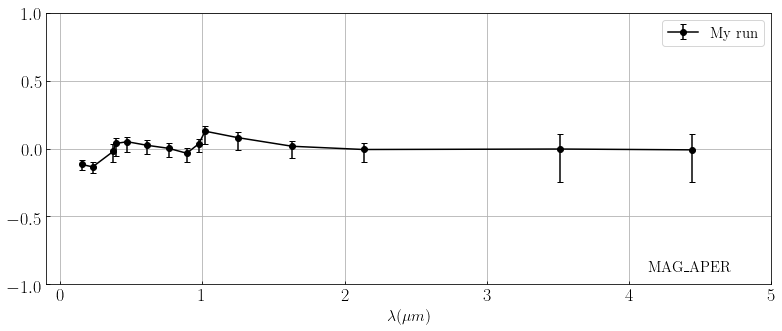

In [283]:
# randomly select
select_ids = np.random.choice(np.arange(len(cat_matched)), size=1000)
cat_output_selected = cat_matched[select_ids]

# check color difference (aperture colors)
print(mag_type)

color_diff = 0
for num,gal in enumerate(cat_output_selected):
    
    mag_list_clauds = []
    mag_list_c20 = []
    mag_list_phos = []
    for i in range(len(filter_set_clauds)):
        
        # mags
        mag_list_clauds.append(gal[filter_set_clauds[i]])
        mag_list_c20.append(gal[filter_set_c20[i]])
#         mag_list_phos.append(gal[filter_set_phos[i]])
    
    # color difference
    color_target = np.array(mag_list_clauds) - gal['i']
    color_c20 = np.array(mag_list_c20) - gal['HSC_i_MAG_AUTO']
    if isinstance(color_diff, int):
        color_diff = color_target-color_c20
    else:
        color_diff = np.vstack([color_diff, color_target-color_c20])


color_diff_median = np.nanmedian(color_diff,axis=0)
color_diff_16 = np.nanpercentile(color_diff,16,axis=0)
color_diff_84 = np.nanpercentile(color_diff,84,axis=0)

fig, axs = plt.subplots(1,1, figsize = (13, 5))        
plt.errorbar(lbeff,color_diff_median,yerr=[color_diff_median-color_diff_16,color_diff_84-color_diff_median],capsize=3,fmt='ok-',label='My run')
plt.xlim([-0.1,5])
plt.ylim([-1,1])
plt.legend(loc='upper right',fontsize=15)

plt.annotate(mag_type.replace('_','\_'),xy=([0.83,0.05]),xycoords='axes fraction',fontsize=15,color='k')
plt.xlabel('$\lambda (\mu m)$',fontsize=16)
plt.grid()